In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from datetime import date
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,roc_auc_score,average_precision_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ifood.xlsx to ifood.xlsx


In [4]:
df = pd.read_excel("ifood.xlsx")

### Data Exploration

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [ ]:
# check null values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


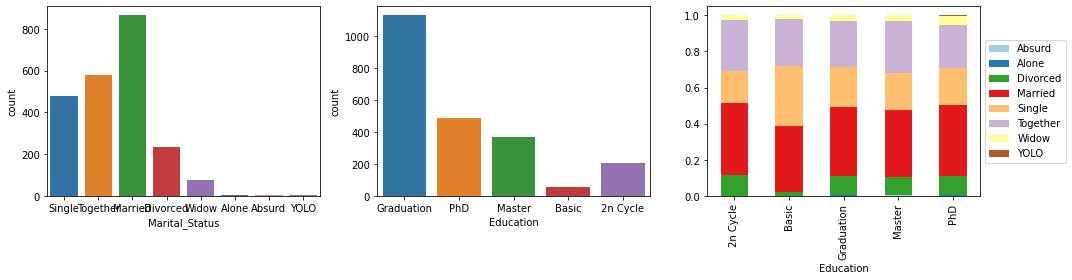

In [ ]:
# Visualize categorical features

fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.countplot(df['Marital_Status'], ax=ax[0])
sns.countplot(df['Education'], ax=ax[1])
df_plot = df.groupby(['Marital_Status', 'Education']).size().reset_index().pivot(columns='Marital_Status', index='Education', values=0)
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[2],  colormap='Paired')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
fig.show()

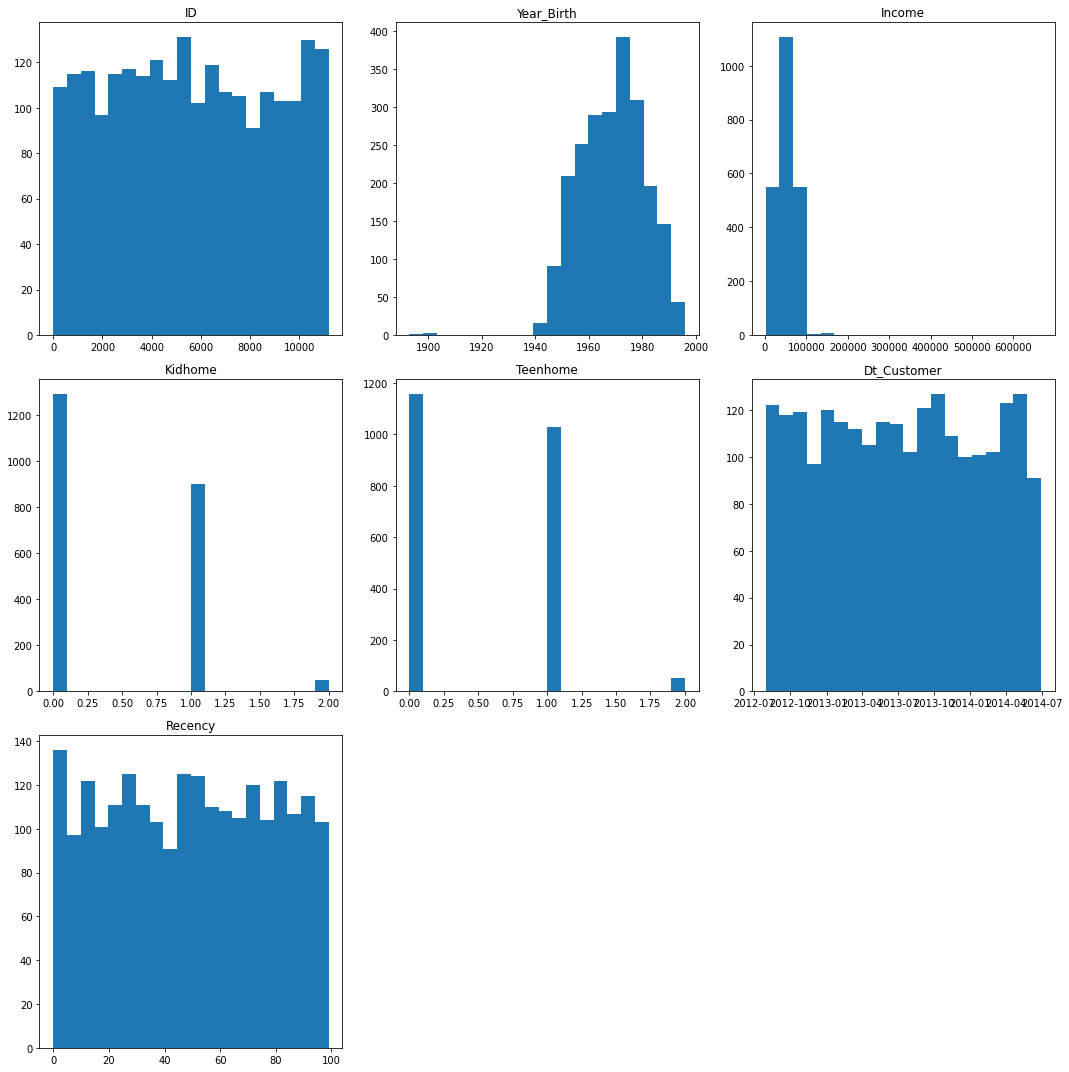

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
df.iloc[:,0:9].hist(bins=20,grid=False)
plt.tight_layout()

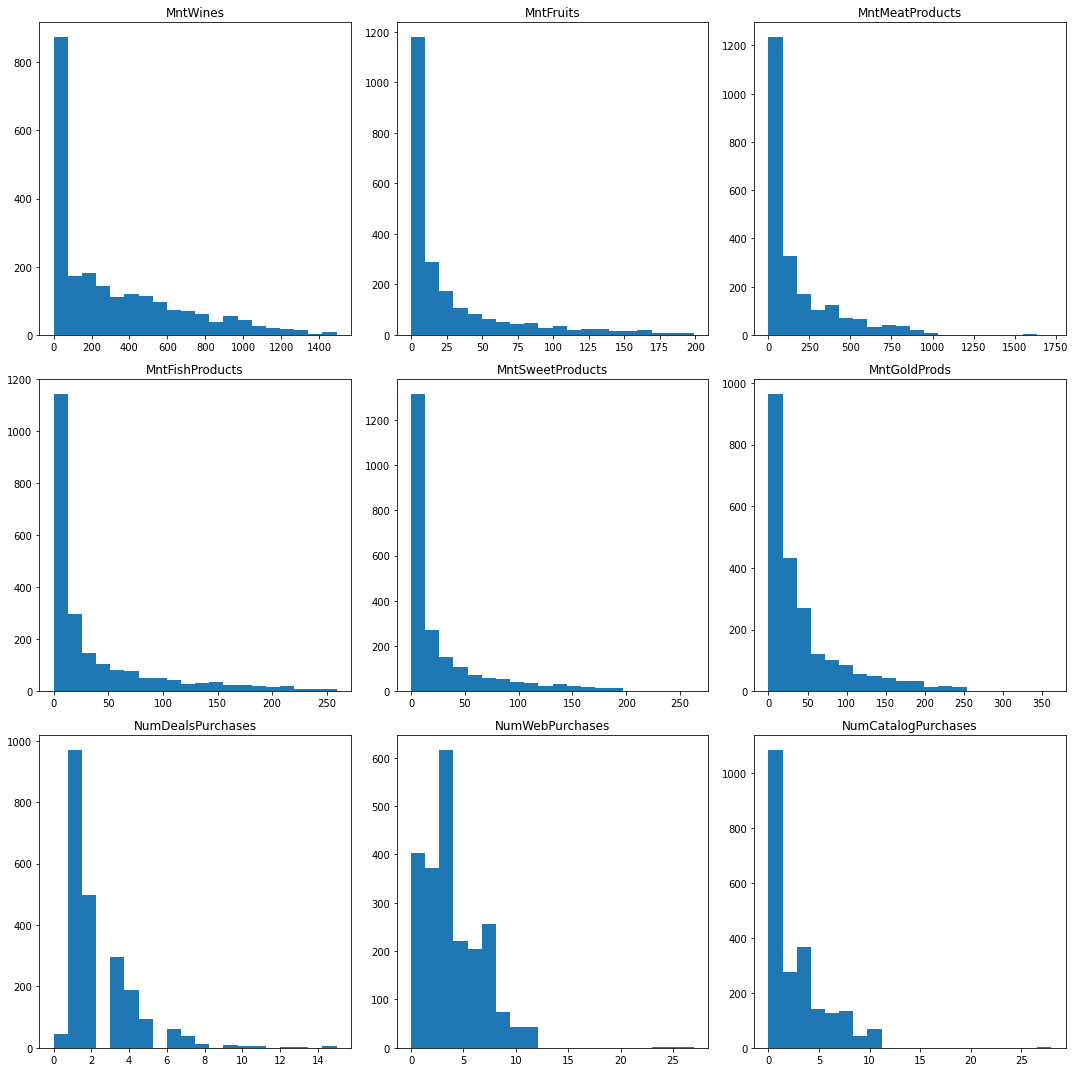

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
df.iloc[:,9:18].hist(bins=20,grid=False)
plt.tight_layout()

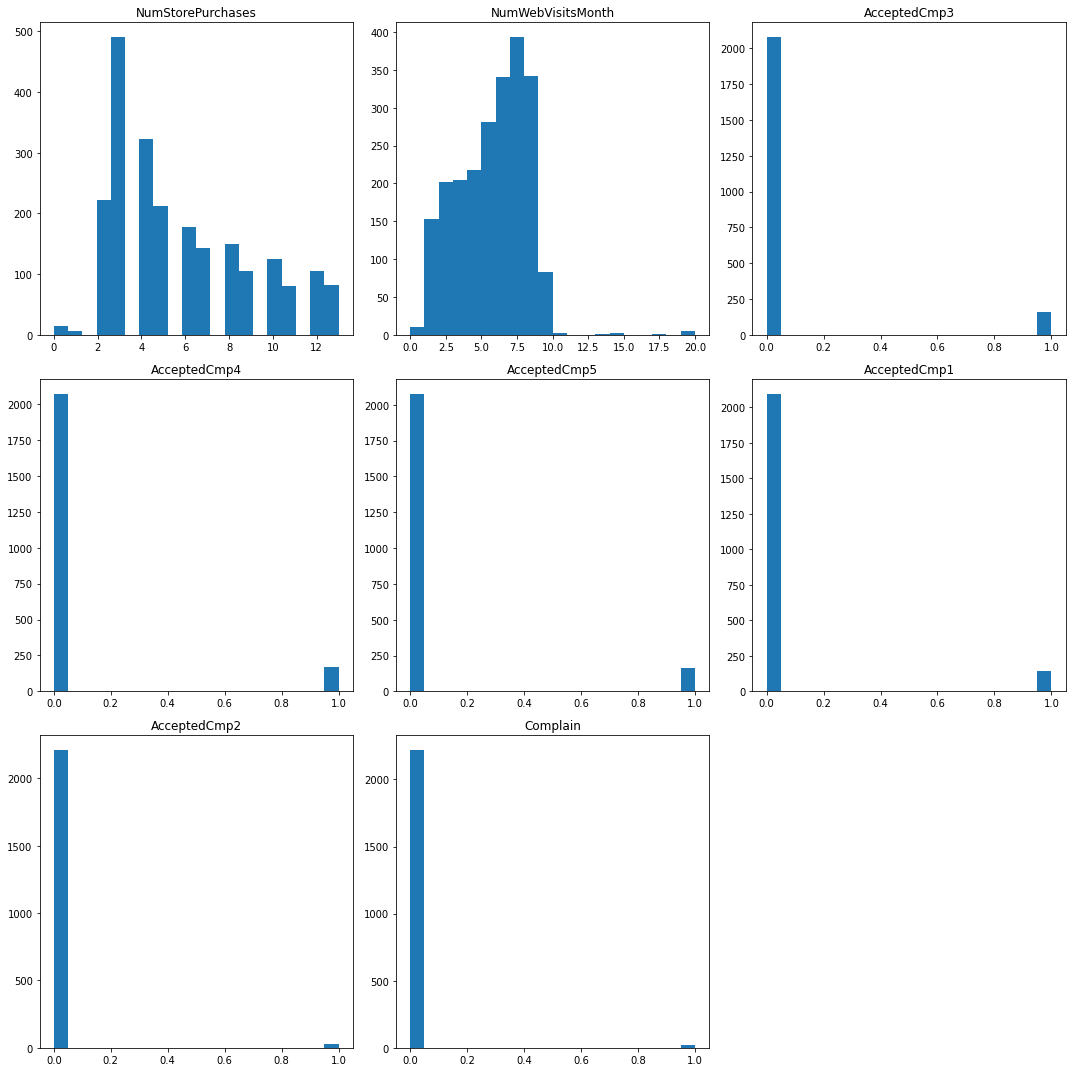

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
df.iloc[:,18:26].hist(bins=20,grid=False)
plt.tight_layout()

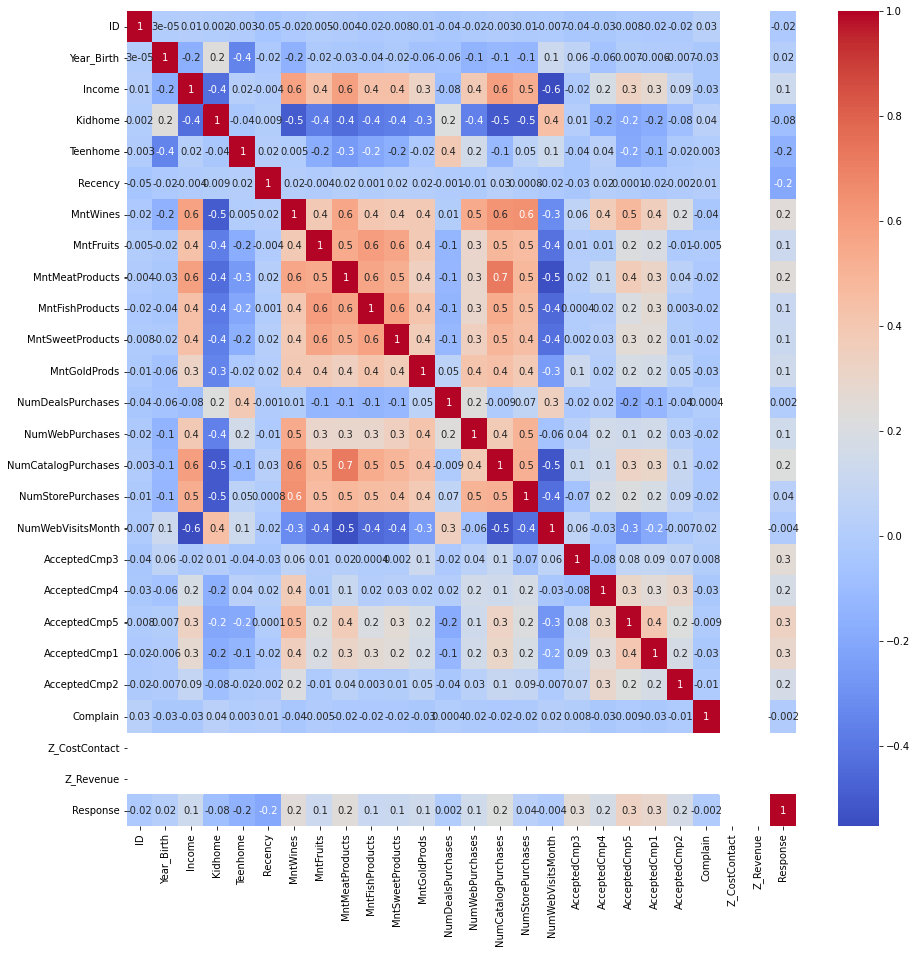

In [ ]:
#correlation between features
sns.heatmap(df.corr(), annot = True, fmt='.1g',cmap= 'coolwarm')

In [5]:
train_data, test_data = sklearn.model_selection.train_test_split(df, train_size = 0.8,random_state=42)

In [6]:
train_data.shape

(1792, 29)

In [7]:
test_data.shape

(448, 29)

### Feature Engineering on training Data

In [8]:
# Create Customer Age Column
train_data['Age'] = date.today().year - train_data['Year_Birth']

# Number of days as a customer
train_data['Customer_Days'] = (pd.to_datetime("now") - pd.to_datetime(train_data['Dt_Customer'])) // np.timedelta64(1,'D')  

In [ ]:
train_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days
792,3479,1950,Graduation,Single,16813.0,0,0,2013-07-19,49,4,...,0,0,0,0,0,3,11,0,72,3363
1271,7488,1963,Master,Single,64191.0,0,1,2013-01-22,30,420,...,0,0,0,0,0,3,11,0,59,3541
1538,1079,1971,PhD,Married,71969.0,0,1,2012-10-16,59,1000,...,1,0,0,0,0,3,11,0,51,3639
668,11007,1968,PhD,Married,29187.0,1,0,2013-05-09,43,26,...,0,0,0,0,0,3,11,0,54,3434
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,0,0,0,0,0,3,11,0,53,3285


In [9]:
# Marital_Status ->  Dummy Variables
train_data.loc[train_data['Marital_Status'].isin(['Alone','Absurd','YOLO']), 'Marital_Status']  = 'Single'
dummy_mari_var_aux = pd.get_dummies(train_data['Marital_Status'], prefix='marital')
train_data_df = pd.concat([train_data,dummy_mari_var_aux],axis=1)


In [ ]:
train_data_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow
792,3479,1950,Graduation,Single,16813.0,0,0,2013-07-19,49,4,...,3,11,0,72,3363,0,0,1,0,0
1271,7488,1963,Master,Single,64191.0,0,1,2013-01-22,30,420,...,3,11,0,59,3541,0,0,1,0,0
1538,1079,1971,PhD,Married,71969.0,0,1,2012-10-16,59,1000,...,3,11,0,51,3639,0,1,0,0,0
668,11007,1968,PhD,Married,29187.0,1,0,2013-05-09,43,26,...,3,11,0,54,3434,0,1,0,0,0
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,3,11,0,53,3285,0,1,0,0,0


In [10]:
# Feature Education to an ordinal number
dummy_edu_var_aux = pd.get_dummies(train_data['Education'], prefix='education')
train_data_df = pd.concat([train_data_df, dummy_edu_var_aux], axis=1)


In [ ]:
train_data_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
792,3479,1950,Graduation,Single,16813.0,0,0,2013-07-19,49,4,...,0,0,1,0,0,0,0,1,0,0
1271,7488,1963,Master,Single,64191.0,0,1,2013-01-22,30,420,...,0,0,1,0,0,0,0,0,1,0
1538,1079,1971,PhD,Married,71969.0,0,1,2012-10-16,59,1000,...,0,1,0,0,0,0,0,0,0,1
668,11007,1968,PhD,Married,29187.0,1,0,2013-05-09,43,26,...,0,1,0,0,0,0,0,0,0,1
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
train_data_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD'],
      dtype='object')

In [11]:

# Drop unused columns
train_data_df.drop(columns=['ID','Marital_Status','Education','Year_Birth','Dt_Customer'], inplace=True)

In [12]:
train_data_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
792,16813.0,0,0,49,4,8,11,12,2,13,...,0,0,1,0,0,0,0,1,0,0
1271,64191.0,0,1,30,420,15,186,151,38,15,...,0,0,1,0,0,0,0,0,1,0
1538,71969.0,0,1,59,1000,0,76,0,0,10,...,0,1,0,0,0,0,0,0,0,1
668,29187.0,1,0,43,26,0,6,0,0,2,...,0,1,0,0,0,0,0,0,0,1
1975,4428.0,0,1,0,16,4,12,2,4,321,...,0,1,0,0,0,0,0,1,0,0


In [13]:
# New data set
customer_columns = ['Age', 'Customer_Days', 'Income', 'Kidhome', 'Teenhome'] + dummy_mari_var_aux.columns.to_list() + dummy_edu_var_aux.columns.to_list()

customer_ifood_df = train_data_df[customer_columns]
customer_ifood_df.head()

,Age,Customer_Days,Income,Kidhome,Teenhome,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
792,72,3364,16813.0,0,0,0,0,1,0,0,0,0,1,0,0
1271,59,3542,64191.0,0,1,0,0,1,0,0,0,0,0,1,0
1538,51,3640,71969.0,0,1,0,1,0,0,0,0,0,0,0,1
668,54,3435,29187.0,1,0,0,1,0,0,0,0,0,0,0,1
1975,53,3286,4428.0,0,1,0,1,0,0,0,0,0,1,0,0


In [14]:
train_data_df.columns
# Sum of purchases
train_data_df['MntTotal'] = train_data_df.loc[:,['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

In [ ]:
train_data_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntRegularProds,AcceptedCmpOverall,Dependents,Total_Purchases
792,16813.0,0,0,49,4,8,11,12,2,13,...,0,0,0,1,0,0,24,1,0,6
1271,64191.0,0,1,30,420,15,186,151,38,15,...,0,0,0,0,1,0,795,0,1,24
1538,71969.0,0,1,59,1000,0,76,0,0,10,...,0,0,0,0,0,1,1066,1,1,19
668,29187.0,1,0,43,26,0,6,0,0,2,...,0,0,0,0,0,1,30,0,1,5
1975,4428.0,0,1,0,16,4,12,2,4,321,...,0,0,0,1,0,0,-283,0,1,25


In [15]:
# Regular Products
train_data_df['MntRegularProds'] = train_data_df.loc[:,'MntTotal'] - train_data_df.loc[:,'MntGoldProds']

In [16]:
# Campaigns Accepted
train_data_df['AcceptedCmpOverall'] = train_data_df.loc[:,['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [17]:
# Creature a feature using Kidhome & Teenhome to find out total number of dependents
train_data_df['Dependents'] = train_data_df['Kidhome'] + train_data_df['Teenhome']

In [18]:
# create a feature to find out total number of purchases 
purchases_cols = [col for col in train_data_df.columns if 'Purchases' in col]
train_data_df['Total_Purchases'] = train_data_df[purchases_cols].sum(axis=1)

In [19]:
customer_columns_ext = customer_columns + ['MntTotal', 'MntRegularProds', 'MntGoldProds', 'AcceptedCmpOverall','Dependents','Total_Purchases']

customer_ifood_df = train_data_df[customer_columns_ext]
customer_ifood_df.head()

,Age,Customer_Days,Income,Kidhome,Teenhome,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,MntGoldProds,AcceptedCmpOverall,Dependents,Total_Purchases
792,72,3364,16813.0,0,0,0,0,1,0,0,...,0,1,0,0,37,24,13,1,0,6
1271,59,3542,64191.0,0,1,0,0,1,0,0,...,0,0,1,0,810,795,15,0,1,24
1538,51,3640,71969.0,0,1,0,1,0,0,0,...,0,0,0,1,1076,1066,10,1,1,19
668,54,3435,29187.0,1,0,0,1,0,0,0,...,0,0,0,1,32,30,2,0,1,5
1975,53,3286,4428.0,0,1,0,1,0,0,0,...,0,1,0,0,38,-283,321,0,1,25


In [ ]:
train_data_df.isna().sum()

Income                  19
Kidhome                  0
Teenhome                 0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Age                      0
Customer_Days            0
marital_Divorced         0
marital_Married          0
marital_Single           0
marital_Together         0
marital_Widow            0
education_2n Cycle       0
education_Basic          0
education_Graduation     0
education_Master         0
education_PhD            0
MntTotal                 0
M

In [20]:
train_data_df.shape

(1792, 41)

In [21]:
# missing data  
train_data_df = train_data_df.dropna()

In [22]:
train_data_df.shape

(1773, 41)

### Features Correlation Analysis

In [23]:
corr = train_data_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1).corr(method='spearman')
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


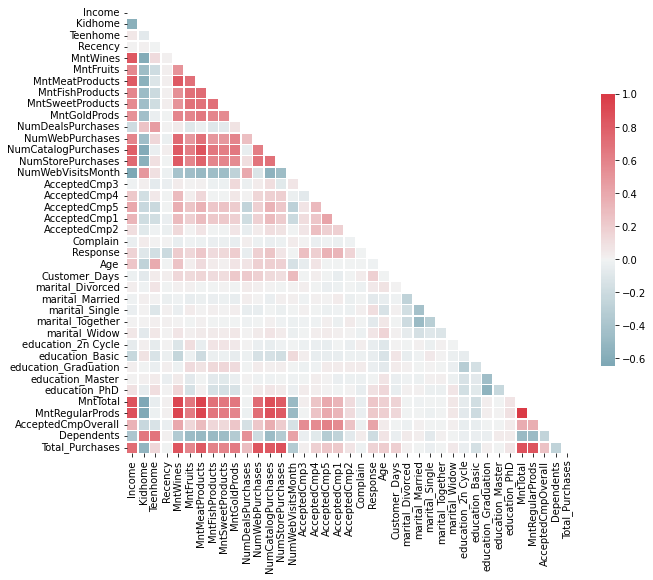

In [ ]:
# Draw the heatmap with the mask and correct aspect ratio
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
#drop unused columns
train_data_df.drop(columns=['Z_CostContact','Z_Revenue'], inplace=True)


In [ ]:
train_data_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntRegularProds,AcceptedCmpOverall,Dependents,Total_Purchases
792,16813.0,0,0,49,4,8,11,12,2,13,...,0,0,0,1,0,0,24,1,0,6
1271,64191.0,0,1,30,420,15,186,151,38,15,...,0,0,0,0,1,0,795,0,1,24
1538,71969.0,0,1,59,1000,0,76,0,0,10,...,0,0,0,0,0,1,1066,1,1,19
668,29187.0,1,0,43,26,0,6,0,0,2,...,0,0,0,0,0,1,30,0,1,5
1975,4428.0,0,1,0,16,4,12,2,4,321,...,0,0,0,1,0,0,-283,0,1,25


### Feature engineering on test data

In [25]:
# Create Age Column for customer
test_data['Age'] = date.today().year - test_data['Year_Birth']

# Number of days as a customer
test_data['Customer_Days'] = (pd.to_datetime("now") - pd.to_datetime(test_data['Dt_Customer'])) // np.timedelta64(1,'D') 

# Marital_Status -> Dummy Variables
test_data.loc[test_data['Marital_Status'].isin(['Alone','Absurd','YOLO']), 'Marital_Status']  = 'Single'
dummy_mari_var_aux = pd.get_dummies(test_data['Marital_Status'], prefix='marital')
test_data_df = pd.concat([test_data,dummy_mari_var_aux],axis=1)

# feature Education to an ordinal number
dummy_edu_var_aux = pd.get_dummies(test_data['Education'], prefix='education')
test_data_df = pd.concat([test_data_df, dummy_edu_var_aux], axis=1)

In [ ]:
test_data_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
324,2607,1953,Graduation,Single,40464.0,0,1,2013-01-11,78,424,...,0,0,1,0,0,0,0,1,0,0
96,7247,1960,Graduation,Widow,47916.0,0,1,2012-11-22,72,505,...,0,0,0,0,1,0,0,1,0,0
2104,5802,1972,Basic,Married,14188.0,0,0,2013-02-28,40,2,...,0,1,0,0,0,0,1,0,0,0
1259,2147,1969,Graduation,Together,76653.0,0,0,2013-08-16,91,736,...,0,0,0,1,0,0,0,1,0,0
1061,3759,1958,Graduation,Together,65196.0,0,2,2013-07-25,34,743,...,0,0,0,1,0,0,0,1,0,0


In [26]:
# Drop unused columns
test_data_df.drop(columns=['ID','Marital_Status','Education','Year_Birth','Dt_Customer'], inplace=True)

In [27]:
# new data set
customer_columns = ['Age', 'Customer_Days', 'Income', 'Kidhome', 'Teenhome'] + dummy_mari_var_aux.columns.to_list() + dummy_edu_var_aux.columns.to_list()

customer_ifood_df = test_data_df[customer_columns]
customer_ifood_df.head()

,Age,Customer_Days,Income,Kidhome,Teenhome,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
324,69,3553,40464.0,0,1,0,0,1,0,0,0,0,1,0,0
96,62,3603,47916.0,0,1,0,0,0,0,1,0,0,1,0,0
2104,50,3505,14188.0,0,0,0,1,0,0,0,0,1,0,0,0
1259,53,3336,76653.0,0,0,0,0,0,1,0,0,0,1,0,0
1061,64,3358,65196.0,0,2,0,0,0,1,0,0,0,1,0,0


In [28]:
test_data_df.columns
# Sum of purchases
test_data_df['MntTotal'] = test_data_df.loc[:,['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

In [29]:
# Regular Products
test_data_df['MntRegularProds'] = test_data_df.loc[:,'MntTotal'] - test_data_df.loc[:,'MntGoldProds']

In [30]:
# Campaigns Accepted
test_data_df['AcceptedCmpOverall'] = test_data_df.loc[:,['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [31]:
# Creature a feature using Kidhome & Teenhome to find out total number of dependents
test_data_df['Dependents'] = test_data_df['Kidhome'] + test_data_df['Teenhome']

In [32]:
# create a feature to find out total number of purchases 
purchases_cols = [col for col in test_data_df.columns if 'Purchases' in col]
test_data_df['Total_Purchases'] = test_data_df[purchases_cols].sum(axis=1)

In [33]:
customer_columns_ext = customer_columns + ['MntTotal', 'MntRegularProds', 'MntGoldProds', 'AcceptedCmpOverall','Dependents','Total_Purchases']

customer_ifood_df = test_data_df[customer_columns_ext]
customer_ifood_df.head()

,Age,Customer_Days,Income,Kidhome,Teenhome,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,MntGoldProds,AcceptedCmpOverall,Dependents,Total_Purchases
324,69,3553,40464.0,0,1,0,0,1,0,0,...,0,1,0,0,589,548,41,0,1,24
96,62,3603,47916.0,0,1,0,0,0,0,1,...,0,1,0,0,531,456,75,1,1,22
2104,50,3505,14188.0,0,0,0,1,0,0,0,...,1,0,0,0,48,21,27,0,0,7
1259,53,3336,76653.0,0,0,0,0,0,1,0,...,0,1,0,0,2153,2027,126,2,0,23
1061,64,3358,65196.0,0,2,0,0,0,1,0,...,0,1,0,0,955,755,200,1,2,26


In [34]:
#drop unused columns
test_data_df.drop(columns=['Z_CostContact','Z_Revenue' ], inplace=True)

In [35]:
train_data_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependents,Total_Purchases
792,16813.0,0,0,49,4,8,11,12,2,13,...,0,0,1,0,0,37,24,1,0,6
1271,64191.0,0,1,30,420,15,186,151,38,15,...,0,0,0,1,0,810,795,0,1,24
1538,71969.0,0,1,59,1000,0,76,0,0,10,...,0,0,0,0,1,1076,1066,1,1,19
668,29187.0,1,0,43,26,0,6,0,0,2,...,0,0,0,0,1,32,30,0,1,5
1975,4428.0,0,1,0,16,4,12,2,4,321,...,0,0,1,0,0,38,-283,0,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,44078.0,1,1,17,24,1,10,2,0,4,...,0,0,1,0,0,37,33,0,2,7
1095,61825.0,0,1,56,162,50,100,55,30,27,...,0,0,1,0,0,397,370,0,1,15
1130,67381.0,0,1,67,815,8,53,11,0,70,...,0,0,0,1,0,887,817,1,1,17
1294,48918.0,1,1,21,52,0,9,0,0,1,...,0,0,0,0,1,61,60,0,2,7


In [36]:
#drop very correlated column
test_data_df.drop(columns=['MntTotal' ], inplace=True)
train_data_df.drop(columns=['MntTotal' ], inplace=True)

In [37]:
train_data_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntRegularProds,AcceptedCmpOverall,Dependents,Total_Purchases
792,16813.0,0,0,49,4,8,11,12,2,13,...,0,0,0,1,0,0,24,1,0,6
1271,64191.0,0,1,30,420,15,186,151,38,15,...,0,0,0,0,1,0,795,0,1,24
1538,71969.0,0,1,59,1000,0,76,0,0,10,...,0,0,0,0,0,1,1066,1,1,19
668,29187.0,1,0,43,26,0,6,0,0,2,...,0,0,0,0,0,1,30,0,1,5
1975,4428.0,0,1,0,16,4,12,2,4,321,...,0,0,0,1,0,0,-283,0,1,25


In [ ]:
test_data_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntRegularProds', 'AcceptedCmpOverall', 'Dependents',
       'Total_Purchases'],
      dtype='object')

In [ ]:
# check null values
test_data_df.isna().sum()

Income                  5
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntRegularProds         0
AcceptedCmpOverall      0
Dependents              0
Total_Purchases         0
dtype: int64

In [38]:
# missing data 
test_data_df = test_data_df.dropna()

In [39]:
# Split dataset into X and y
X_train = train_data_df.drop('Response', axis=1) 
y_train = train_data_df['Response']

X_test = test_data_df.drop('Response', axis=1) 
y_test= test_data_df['Response']

In [40]:
print(X_train.shape)
print(X_test.shape)

(1773, 37)
(443, 37)


In [41]:
y_train.shape

(1773,)

# Modeling

In [42]:
!pip install imbalanced-learn
import imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
#Apply Over Sampling
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [51]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

bestfeatures = SelectKBest(k=10, score_func=f_classif )
fit = bestfeatures.fit(X_over,y_over)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_over.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')   #print 10 best features
a=featureScores.nlargest(10,'Score')['Specs']

In [77]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
 
# define models and parameters
model = LogisticRegression(  )
solvers = [ 'lbfgs', 'liblinear','newton-cg']
penalty = ['l2']
c_values = [    0.01 ]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_over[a ] , y_over  )
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.801875 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.795107 (0.015209) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.794664 (0.014819) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.801875 (0.018050) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,roc_auc_score,average_precision_score

logReg = LogisticRegression(C=0.01, solver='newton-cg',penalty="l2")
#logReg = LogisticRegression(C=1.0 , solver='lbfgs',penalty="l2" ) 
#logReg = LogisticRegression(C=0.1 , solver='newton-cg',penalty="l2" ) 
lrc = logReg.fit(X_over[a] , y_over)
y_over_pred_LR = lrc.predict(X_over[a] )
y_test_pred_LR = lrc.predict(X_test[a] )

print('Logistic Training Accuracy:', accuracy_score(y_over, y_over_pred_LR))
print('Logistic Training AUC:', roc_auc_score(y_over, y_over_pred_LR))
print('Logistic Validation Accuracy:', accuracy_score(y_test, y_test_pred_LR))
print('Logistic Validation AUC:', roc_auc_score(y_test, y_test_pred_LR))

Logistic Training Accuracy: 0.8073353954927088
Logistic Training AUC: 0.7553344829344006
Logistic Validation Accuracy: 0.8419864559819413
Logistic Validation AUC: 0.6641284972487019


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [78]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,roc_auc_score,average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold 

In [79]:
# Fitting the decision tree with default hyperparameters, apart from max_depth which is 3

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [92]:
# Create parameter grid
params = {'max_features': [  'auto' ], 
    'max_depth': [    13  ],
    'min_samples_leaf': [5  ],
    'min_samples_split': [  100],
    'criterion': ["gini", "entropy"],
    'class_weight':['balanced']
}

In [93]:
grid = GridSearchCV(dt, param_grid=params,cv=5, n_jobs=-1, verbose=1, scoring = "roc_auc")

In [94]:
%%time
grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 58.8 ms, sys: 4.05 ms, total: 62.8 ms
Wall time: 126 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [13],
                         'max_features': ['auto'], 'min_samples_leaf': [5],
                         'min_samples_split': [100]},
             scoring='roc_auc', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014073,0.007641,0.013047,0.005219,gini,2,log2,5,2,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.714226,0.744353,0.681195,0.681276,0.705262,0.026282,878
1,0.009588,0.003055,0.008501,0.004045,gini,2,log2,5,3,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.621433,0.744172,0.696548,0.712985,0.693785,0.045139,909
2,0.012143,0.003283,0.010275,0.005505,gini,2,log2,5,50,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.599727,0.698095,0.694357,0.603509,0.648922,0.047341,959
3,0.007436,0.002541,0.008539,0.003739,gini,2,log2,5,100,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.688472,0.750382,0.697432,0.657584,0.698467,0.033420,901
4,0.010085,0.003318,0.010359,0.005570,gini,2,log2,8,2,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.714206,0.733221,0.668134,0.663472,0.694758,0.029771,907


In [95]:
grid.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=13,
                       max_features='auto', min_samples_leaf=5,
                       min_samples_split=100)

In [96]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 100}

In [97]:
grid.best_score_

0.8046922459661578

In [127]:
# rebuild model with best estimators

dt_model = DecisionTreeClassifier(class_weight='balanced', max_depth=13,
                       max_features='auto', min_samples_leaf=5,
                       min_samples_split=100)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=13,
                       max_features='auto', min_samples_leaf=5,
                       min_samples_split=100)

In [128]:
# Evaluating model performance

y_train_predDT = dt_model.predict(X_train)
y_test_predDT = dt_model.predict(X_test)

print('Decision Tree accucracy:', accuracy_score(y_train, y_train_predDT))
print('Decision Tree auc:', roc_auc_score(y_train, y_train_predDT))


Decision Tree accucracy: 0.7535250987027636
Decision Tree auc: 0.8114494849087295


In [129]:
print('Decision Tree accucracy:', accuracy_score(y_test, y_test_predDT))
print('Decision Tree auc:', roc_auc_score(y_test, y_test_predDT))


Decision Tree accucracy: 0.6975169300225733
Decision Tree auc: 0.714485003487561


In [132]:
#RF
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
 #param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
from sklearn.model_selection import GridSearchCV
param_grid = {
'n_estimators': [   500,800,1000  ],  
'max_depth': [5,   None],  
'bootstrap': [True, False],
'max_features': ['auto', 'sqrt'] } 
model =RandomForestClassifier(bootstrap=True)
kfold = KFold(n_splits=5,shuffle=True, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=kfold)
grid_result = grid.fit(X_over[a], y_over)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.940788 using {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 800}
0.821911 (0.014453) with: {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
0.821469 (0.011408) with: {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 800}
0.819256 (0.012757) with: {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 1000}
0.822355 (0.014080) with: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
0.823680 (0.012219) with: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 800}
0.822352 (0.013110) with: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 1000}
0.936814 (0.004495) with: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}
0.938583 (0.006406) with: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 800}
0.936814 (0.005295) with: {'bo

In [147]:
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
#Fit RF into test dataset
Classifier=RandomForestClassifier(  bootstrap=False , max_depth= None, max_features='sqrt' ,   n_estimators=800 )
#(bootstrap= False, max_depth= None, max_features='sqrt',   n_estimators=500  )
Classifier.fit(X_over[a], y_over)
 
rf_predict=  Classifier.predict(X_over[a] )
print("Accuracy")
print(accuracy_score(y_over, rf_predict ))
print("AUC")
print( roc_auc_score(y_over, rf_predict ))

 
rf_predict=  Classifier.predict(X_test[a] )
print("Accuracy")
print(accuracy_score(y_test, rf_predict ))
print("AUC")
print( roc_auc_score(y_test, rf_predict ))

Accuracy
0.9946973044631021
AUC
0.9950285027237108
Accuracy
0.8442437923250564
AUC
0.6240990467333178


XGboost

In [141]:
 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

model_xgb=XGBClassifier(n_jobs=-1,random_state=42,eval_metric='logloss')
parameters = {'n_estimators':[ 100,200],'max_depth':[3,4 ],'learning_rate':[0.1,0.01]}
model_xgb_grid = GridSearchCV(model_xgb, parameters,cv=5,verbose=1).fit(X_train,y_train)
print(model_xgb_grid.best_params_)

print('XGB Classifier Cros validation score:',model_xgb_grid.best_score_*100)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
XGB Classifier Cros validation score: 89.62154850003978


In [142]:
model_xgb=XGBClassifier(n_jobs=-1,random_state=42,n_estimators=100,max_depth=3,learning_rate=0.1,scale_pos_weight=5)
model_xgb.fit(X_train,y_train)
print('XGB Classifier Classifier Train score:',model_xgb.score(X_train,y_train)*100)

XGB Classifier Classifier Train score: 92.89340101522842


In [143]:
y_test_pred = model_xgb.predict(X_test)

In [144]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       374
           1       0.47      0.62      0.53        69

    accuracy                           0.83       443
   macro avg       0.70      0.75      0.72       443
weighted avg       0.85      0.83      0.84       443



In [145]:
cross_val_score(model_xgb, X_train, y_train, cv=10, scoring='roc_auc').mean()

0.9096892448570154

In [146]:
print('AUC:', roc_auc_score(y_test, y_test_pred))

AUC: 0.7460861815081765


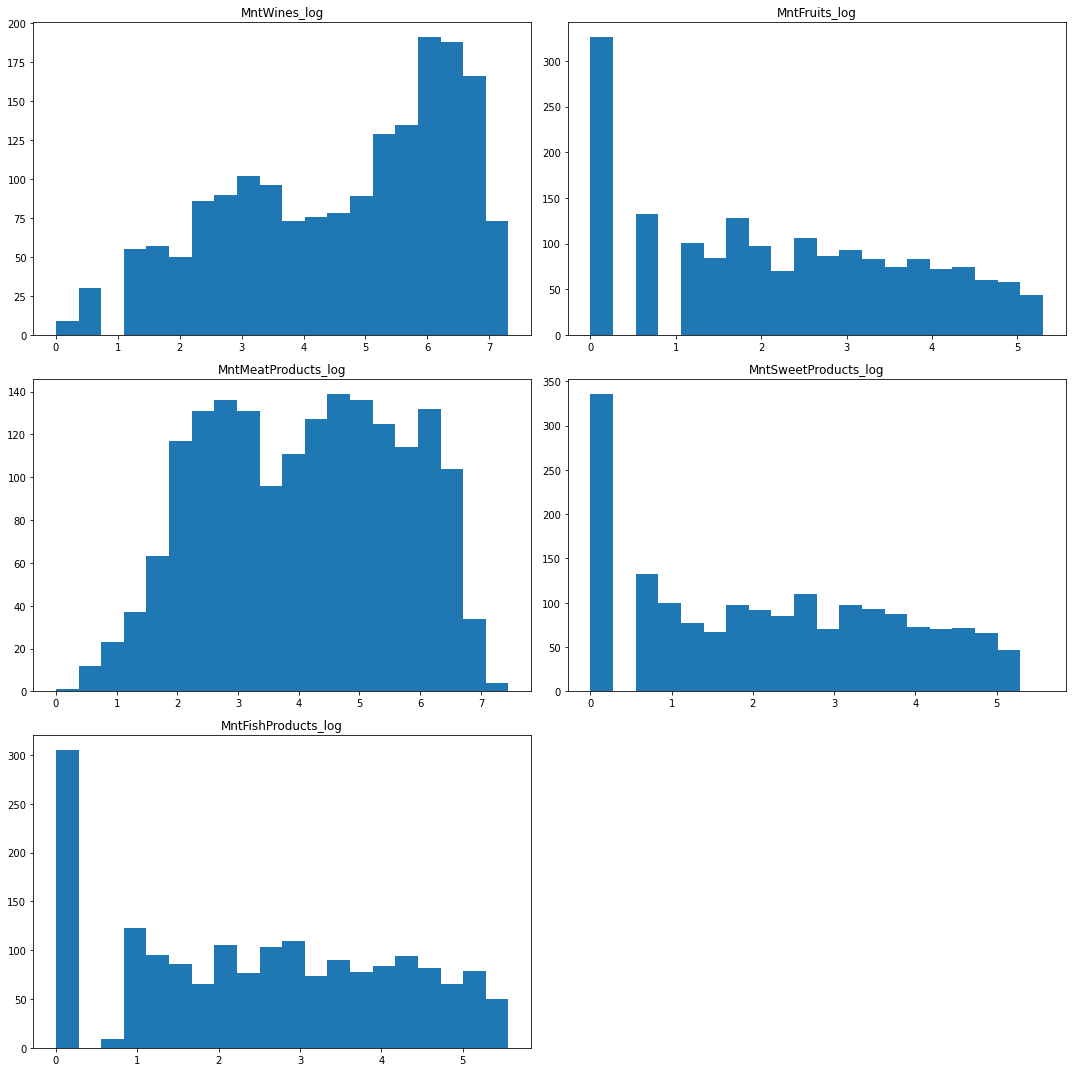

In [ ]:
# Log transform X features
import numpy as np

for df in [X_train,X_test]:
  for col in ['MntWines','MntFruits','MntMeatProducts','MntSweetProducts','MntFishProducts']:
    df[col+'_log'] = np.log(df[col]+1)
    

plt.rcParams["figure.figsize"] = (15,15)
X_train[['MntWines_log','MntFruits_log','MntMeatProducts_log','MntSweetProducts_log','MntFishProducts_log']].hist(bins=20,grid=False)
plt.tight_layout()

In [ ]:
#X_train.drop(['MntWines','MntFruits','MntMeatProducts','MntSweetProducts','MntFishProducts'],axis=1,inplace=True)
X_test.drop(['MntWines','MntFruits','MntMeatProducts','MntSweetProducts','MntFishProducts'],axis=1,inplace=True)
X_train

,Income,Kidhome,Teenhome,Recency,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,education_PhD,MntRegularProds,AcceptedCmpOverall,Dependents,Total_Purchases,MntWines_log,MntFruits_log,MntMeatProducts_log,MntSweetProducts_log,MntFishProducts_log
792,16813.0,0,0,49,13,1,2,0,3,7,...,0,24,1,0,6,1.609438,2.197225,2.484907,1.098612,2.564949
1271,64191.0,0,1,30,15,3,5,3,13,3,...,0,795,0,1,24,6.042633,2.772589,5.231109,3.663562,5.023881
1538,71969.0,0,1,59,10,3,3,4,9,8,...,1,1066,1,1,19,6.908755,0.000000,4.343805,0.000000,0.000000
668,29187.0,1,0,43,2,1,1,0,3,8,...,1,30,0,1,5,3.295837,0.000000,1.945910,0.000000,0.000000
1975,4428.0,0,1,0,321,0,25,0,0,1,...,0,-283,0,1,25,2.833213,1.609438,2.564949,1.609438,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,44078.0,1,1,17,4,2,2,0,3,5,...,0,33,0,2,7,3.218876,0.693147,2.397895,0.000000,1.098612
1095,61825.0,0,1,56,27,1,4,2,8,4,...,0,370,0,1,15,5.093750,3.931826,4.615121,3.433987,4.025352
1130,67381.0,0,1,67,70,4,2,2,9,7,...,0,817,1,1,17,6.704414,2.197225,3.988984,0.000000,2.484907
1294,48918.0,1,1,21,1,2,1,0,4,4,...,1,60,0,2,7,3.970292,0.000000,2.302585,0.000000,0.000000


# Model Performance and Cluster Analysis

In [148]:
# Fit best LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=3000, C=1 , solver='lbfgs', penalty="l2") 
 
logReg.fit(X_over[a],y_over)
y_test_pred_log = logReg.predict(X_test[a])
print('Logistic Reg. AUC:', roc_auc_score(y_test, y_test_pred_log))
# Fit best XGBOOST
from xgboost import XGBClassifier
model_xgb_best = XGBClassifier(n_jobs=-1,random_state=42,n_estimators=100,max_depth=3,learning_rate=0.1,scale_pos_weight=5)

model_xgb_best.fit(X_train,y_train)
y_test_pred_xgb = model_xgb_best.predict(X_test)
print('XGBoost AUC:', roc_auc_score(y_test, y_test_pred_xgb))

# Fit best RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(  bootstrap=False , max_depth= None, max_features='auto',   n_estimators=1000  )
rfc.fit(X_over[a],y_over)
y_test_pred_rfc = rfc.predict(X_test[a])
print('Random Forest AUC:', roc_auc_score(y_test, y_test_pred_rfc))

# Fit best DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=13, max_features='auto', min_samples_leaf=5, min_samples_split=100, class_weight='balanced',random_state=0)
dtc.fit(X_train,y_train)
y_test_pred_dtc = dtc.predict(X_test)
print('Decision Tree AUC:', roc_auc_score(y_test, y_test_pred_dtc))

Logistic Reg. AUC: 0.638940556459738
XGBoost AUC: 0.7460861815081765
Random Forest AUC: 0.6240990467333178
Decision Tree AUC: 0.7060373556537239


Add Predictions to Analyze Our Results

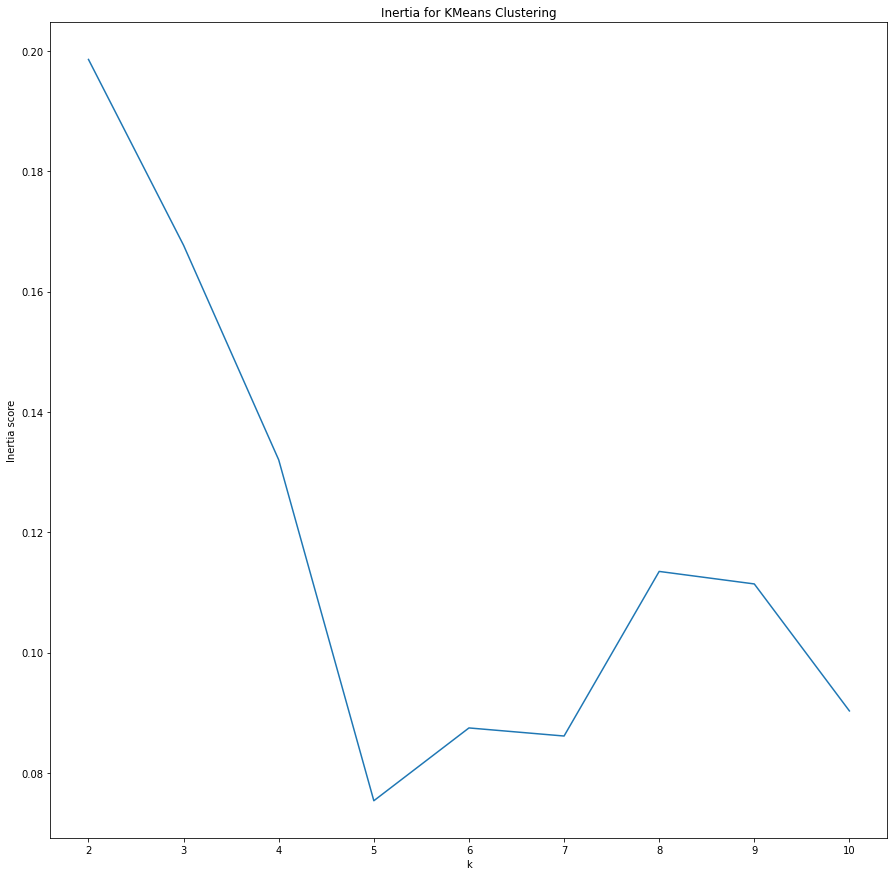

Min Inertia Score 0.07535530609658848


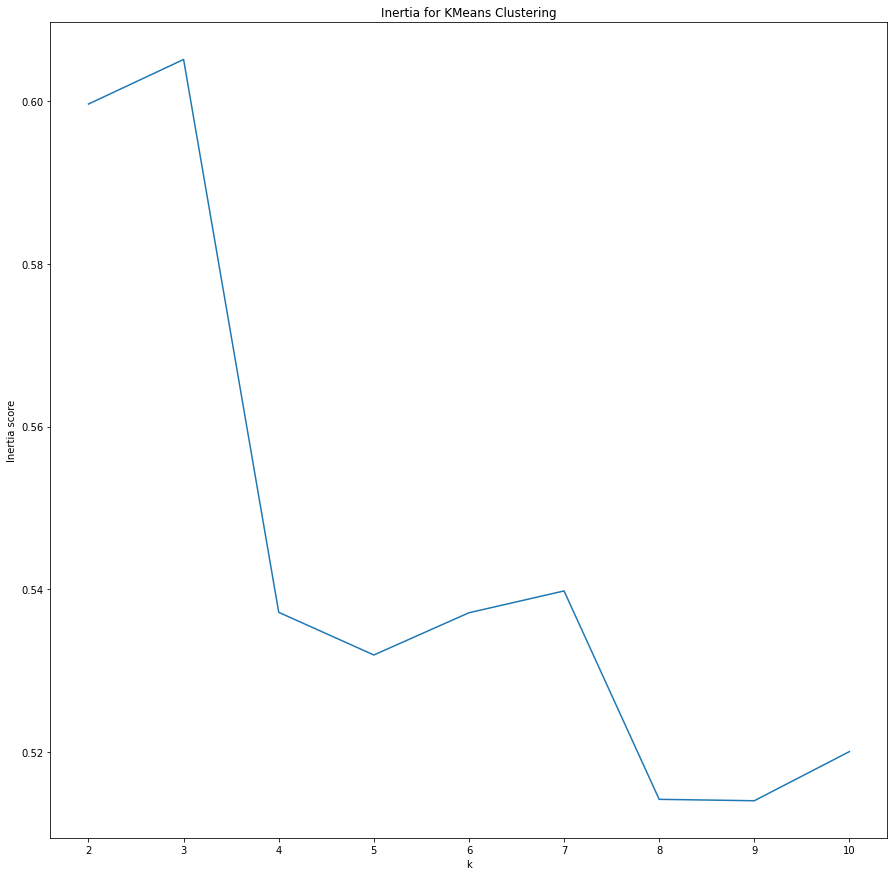

Min Inertia Score 0.5140241274473639


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(X_train)

def clustering_graph(input_data):
  sil_scores=[]
  dav_scores=[]
  km_eval=[]
  ## fit and predict clusters
  for i in range(2,11):
      kmeans_model=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
      kmeans_model.fit(input_data)
      km_eval.append(kmeans_model.inertia_)
      sil_scores.append(silhouette_score(input_data, kmeans_model.labels_))
      dav_scores.append(davies_bouldin_score(input_data, kmeans_model.labels_))

  # Plot Kmeans for k from 1 to 10 criterion
  plt.plot(range(2,11), sil_scores)
  plt.title('Inertia for KMeans Clustering')
  plt.xlabel('k')
  plt.ylabel('Inertia score')
  plt.show()
  print("Min Inertia Score",min(sil_scores))

clustering_graph(Xtrain_scaled)
clustering_graph(X_train)

In [ ]:
Xtest_scaled = scaler.transform(X_test)

kmeans_bestModel=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_bestModel.fit(Xtrain_scaled)
cluster_preds = kmeans_bestModel.predict(Xtest_scaled)

In [ ]:
Xtest_analysis = X_test
Xtest_analysis['predictions'] = list(y_test_pred_xgb)
Xtest_analysis['True values'] = list(y_test)
Xtest_analysis['cluster'] = list(cluster_preds)
Xtest_analysis.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntRegularProds,AcceptedCmpOverall,Dependents,Total_Purchases,predictions,True values,cluster
324,40464.0,0,1,78,424,17,118,7,23,41,...,1,0,0,548,0,1,24,0,0,3
96,47916.0,0,1,72,505,0,26,0,0,75,...,1,0,0,456,1,1,22,0,0,3
2104,14188.0,0,0,40,2,7,11,16,12,27,...,0,0,0,21,0,0,7,0,0,0
1259,76653.0,0,0,91,736,63,946,219,189,126,...,1,0,0,2027,2,0,23,0,0,1
1061,65196.0,0,2,34,743,19,181,12,0,200,...,1,0,0,755,1,2,26,0,0,3


In [ ]:
Xtest_analysis[['Age','Income','cluster','NumWebVisitsMonth','NumCatalogPurchases','NumDealsPurchases','NumWebPurchases','NumStorePurchases','Customer_Days']].groupby(['cluster']).mean()

,Age,Income,NumWebVisitsMonth,NumCatalogPurchases,NumDealsPurchases,NumWebPurchases,NumStorePurchases,Customer_Days
cluster,,,,,,,,
0,45.137255,30176.009804,6.813725,0.568627,1.715686,2.382353,3.245098,3364.490196
1,53.365854,80266.121951,3.268293,5.780488,1.195122,6.024390,8.341463,3384.146341
2,53.204819,74153.710843,2.746988,5.506024,1.216867,4.963855,8.686747,3375.277108
3,56.924370,57053.865546,6.058824,3.067227,4.058824,6.672269,7.647059,3422.705882
4,59.204082,44238.520408,6.030612,0.704082,2.591837,2.489796,3.622449,3318.642857


In [ ]:
Xtest_analysis[['Age','Income','cluster','NumWebVisitsMonth','NumCatalogPurchases','NumDealsPurchases','NumWebPurchases','NumStorePurchases']].groupby(['cluster']).min()

,Age,Income,NumWebVisitsMonth,NumCatalogPurchases,NumDealsPurchases,NumWebPurchases,NumStorePurchases
cluster,,,,,,,
0,26,4861.0,2,0,0,0,0
1,31,49118.0,1,2,0,2,4
2,33,52513.0,1,2,0,2,4
3,31,27421.0,2,1,1,2,4
4,41,17144.0,1,0,0,0,1


In [ ]:
Xtest_analysis[['Age','Income','cluster','NumWebVisitsMonth','NumCatalogPurchases','NumDealsPurchases','NumWebPurchases','NumStorePurchases']].groupby(['cluster']).max()

,Age,Income,NumWebVisitsMonth,NumCatalogPurchases,NumDealsPurchases,NumWebPurchases,NumStorePurchases
cluster,,,,,,,
0,76,73395.0,14,5,6,7,7
1,78,102160.0,8,10,5,11,13
2,76,98777.0,8,11,3,11,13
3,78,79761.0,9,9,15,11,13
4,129,162397.0,9,3,8,6,8


In [ ]:
from sklearn.metrics import f1_score, precision_score

Xtest_analysis[['cluster','predictions','True values']]

for cluster in [0,1,2,3,4]:
  cluster_df = Xtest_analysis[Xtest_analysis['cluster'] == cluster]

  from sklearn.metrics import precision_score, recall_score, f1_score
  print('------------------------------------')
  print('Cluster',cluster,'Results')
  print('AUC:', roc_auc_score(cluster_df['True values'], cluster_df['predictions']))
  print("F1 Score:",f1_score(cluster_df['True values'], cluster_df['predictions'], average="binary"))
  #print("Accuracy:",metrics.accuracy_score(y_test, predict_test))
  print("Precision:",precision_score(cluster_df['True values'], cluster_df['predictions'], average="binary"))
  #print("Recall:",metrics.recall_score(y_test, predict_test, average="binary"))

------------------------------------
Cluster 0 Results
AUC: 0.6597701149425287
F1 Score: 0.42857142857142855
Precision: 0.46153846153846156
------------------------------------
Cluster 1 Results
AUC: 0.748792270531401
F1 Score: 0.7441860465116279
Precision: 0.64
------------------------------------
Cluster 2 Results
AUC: 0.7191176470588236
F1 Score: 0.5142857142857143
Precision: 0.45
------------------------------------
Cluster 3 Results
AUC: 0.6937590711175616
F1 Score: 0.3888888888888889
Precision: 0.30434782608695654
------------------------------------
Cluster 4 Results
AUC: 0.7791666666666667
F1 Score: 0.5263157894736842
Precision: 0.45454545454545453


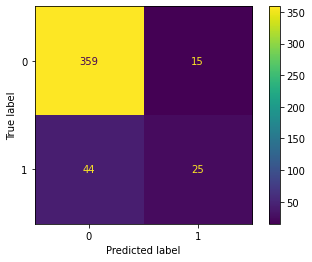

In [ ]:
y_pred_classed = (y_test_predProba_xgb >= 0.42).astype(int)
confusion_plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model_xgb_best.classes_)
confusion_plot.plot()
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_model.fit(Xtrain_scaled)
X_train['cluster'] = list(kmeans_model.labels_)

In [ ]:
X_together = pd.concat([X_train,X_test],axis=0,ignore_index=True)
y_together = pd.concat([y_train,y_test],axis=0,ignore_index=True)
all_data = pd.concat([X_together,y_together],axis=1)
all_data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Master,education_PhD,MntRegularProds,AcceptedCmpOverall,Dependents,Total_Purchases,cluster,predictions,True values,Response
0,16813.0,0,0,49,4,8,11,12,2,13,...,0,0,24,1,0,6,0,NaN,NaN,0
1,64191.0,0,1,30,420,15,186,151,38,15,...,1,0,795,0,1,24,3,NaN,NaN,0
2,71969.0,0,1,59,1000,0,76,0,0,10,...,0,1,1066,1,1,19,3,NaN,NaN,0
3,29187.0,1,0,43,26,0,6,0,0,2,...,0,1,30,0,1,5,0,NaN,NaN,0
4,4428.0,0,1,0,16,4,12,2,4,321,...,0,0,-283,0,1,25,3,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,82584.0,0,0,26,1076,68,103,29,91,68,...,1,0,1299,2,0,16,1,1.0,1.0,1
2212,50127.0,0,1,88,274,0,21,4,6,15,...,0,0,290,1,1,13,4,0.0,0.0,0
2213,63855.0,0,0,28,359,35,314,93,116,89,...,0,0,828,0,0,24,2,0.0,0.0,0
2214,62637.0,0,1,76,104,12,48,4,12,5,...,1,0,175,0,1,10,4,0.0,0.0,0


In [ ]:
cluster_responses = all_data.groupby(['cluster','Response']).size().reset_index(name='count')
cluster_responses['Percentage'] = cluster_responses['count'] / cluster_responses.groupby('cluster')['count'].transform('sum')
cluster_responses

,cluster,Response,count,Percentage
0,0,0,525,0.883838
1,0,1,69,0.116162
2,1,0,104,0.485981
3,1,1,110,0.514019
4,2,0,330,0.848329
5,2,1,59,0.151671
6,3,0,459,0.874286
7,3,1,66,0.125714
8,4,0,465,0.941296
9,4,1,29,0.058704
